In [1]:
# load packages
import torch
import pandas
import numpy as np
import plotly.express as px
import kaleido
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.pyplot import legend
from datasets import Dataset
from sklearn.manifold import TSNE

In [2]:
# load distance matrix from file
distance_matrix = torch.load("../data/distance_matrix")

In [25]:
# transform distance matrix to 2-dimensional distance matrix
distance_matrix_embedded = TSNE(n_components=2, # number of desired dimensions
                                learning_rate='auto',
                                n_iter=5000, # number of iterations default is 1000
                                early_exaggeration=12.0, # default is 12.0
                                init='random',
                                perplexity=5 # perplexity is related to the number of neighbours
                                ).fit_transform(distance_matrix)

In [6]:
# load distance matrix ids
distance_matrix_ids = torch.load("../data/distance_matrix_ids")

In [4]:
# get shape of transformed matrix
distance_matrix_embedded.shape

(7908, 2)

In [35]:
# print embedded distance matrix
distance_matrix_embedded

array([[ -19.122   ,  -15.534377],
       [ -15.776139,  -76.300476],
       [  -8.955099, -101.21797 ],
       ...,
       [ -11.104919,   15.802686],
       [  46.123592,  -36.95889 ],
       [  87.810165,   42.528385]], dtype=float32)

In [26]:
# turn matrix into pandas data frame
df = pandas.DataFrame(distance_matrix_embedded, columns=['x','y'])

In [27]:
# add ids to data frame
df['id'] = distance_matrix_ids

In [27]:
# load video data
videos = Dataset.load_from_disk("../data/videos")

In [28]:
# add channel to data frame
df['channel'] = videos['channel']

In [8]:
# add color column to given data frame
def add_color_column(dataframe):
    colors = []
    for d in dataframe['channel']:
        if d == 'Al-Jazeera-English':
            colors.append('orange')
        if d == 'BBC-News':
            colors.append('red')
        if d == 'CCTV-Video-News-Agency':
            colors.append('black')
        if d == 'CNN-News':
            colors.append('purple')
        if d == 'DW-News':
            colors.append('blue')
        if d == 'Fox-News':
            colors.append('darkgreen')
    # add them to the data frame
    dataframe['colors'] = colors

In [29]:
add_color_column(df)
df

x         y             channel     colors
0    -0.210577  0.731186  Al-Jazeera-English     orange
1    -0.518091  2.312838  Al-Jazeera-English     orange
2    -0.370276  1.042976  Al-Jazeera-English     orange
3     0.052997 -0.190532  Al-Jazeera-English     orange
4    -0.688623  0.453686  Al-Jazeera-English     orange
...        ...       ...                 ...        ...
7903  0.568822  2.578376            Fox-News  darkgreen
7904  0.839614  0.322940            Fox-News  darkgreen
7905  1.213714 -1.506810            Fox-News  darkgreen
7906  1.156679  0.474651            Fox-News  darkgreen
7907  1.753931  0.436754            Fox-News  darkgreen

[7908 rows x 4 columns]

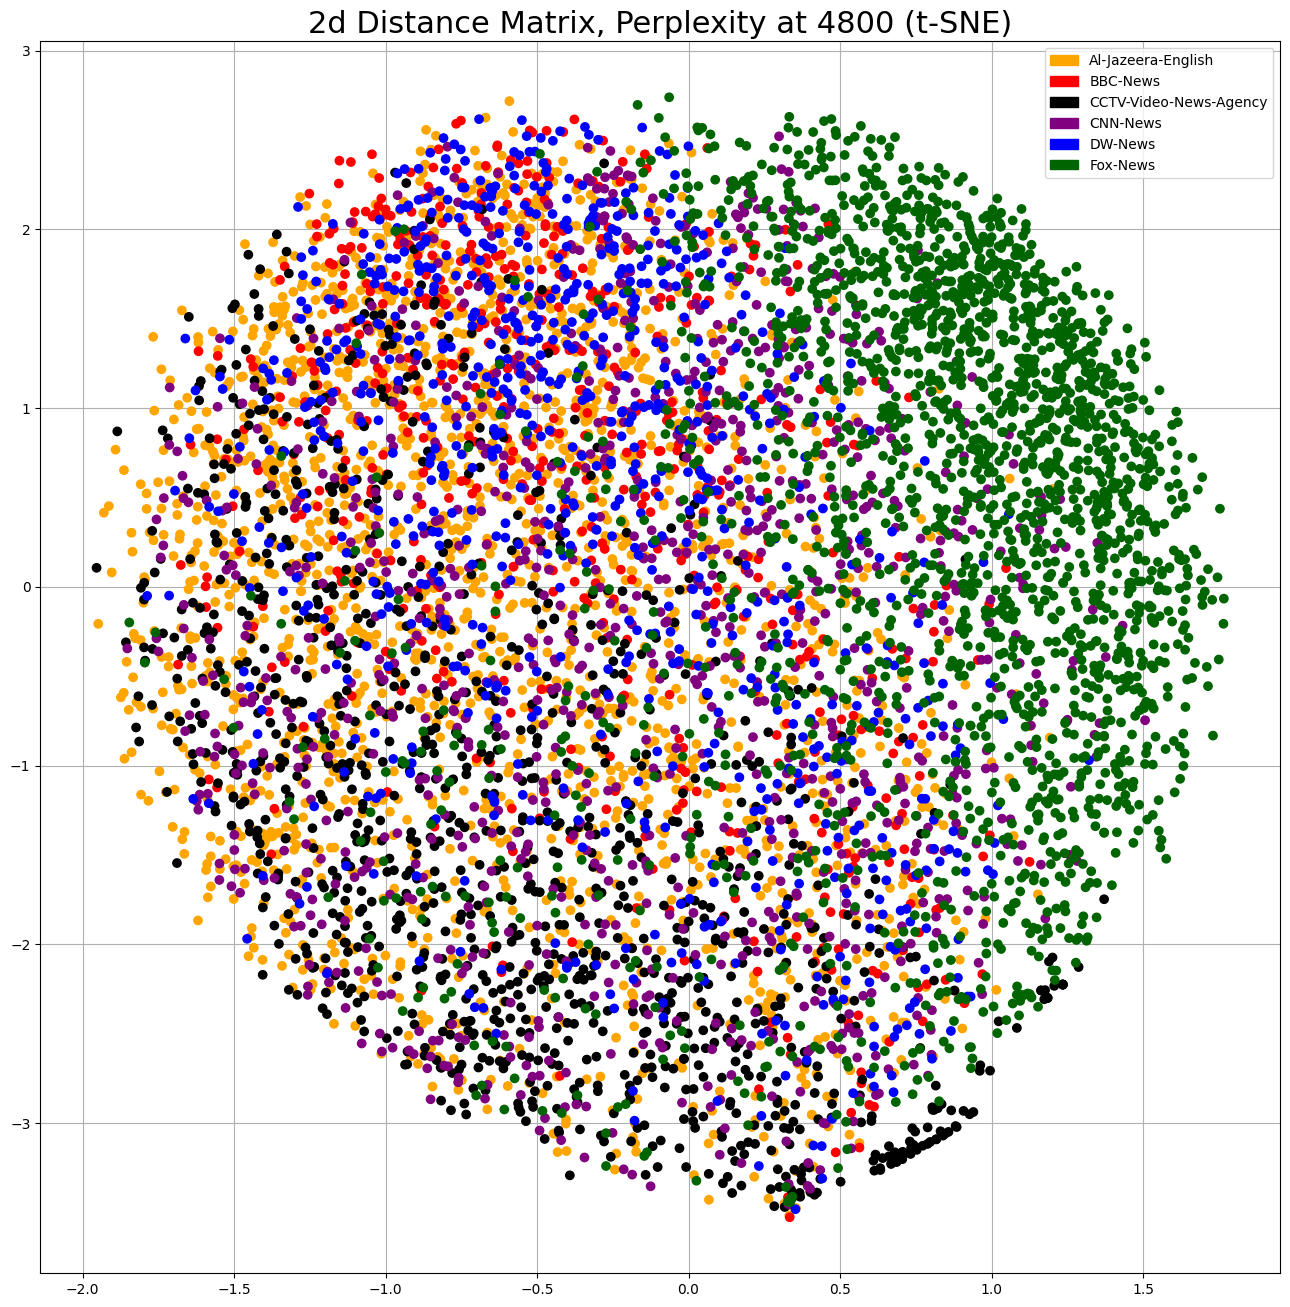

In [30]:
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label='Al-Jazeera-English')
pop_b = mpatches.Patch(color='red', label='BBC-News')
pop_c = mpatches.Patch(color='black', label='CCTV-Video-News-Agency')
pop_d = mpatches.Patch(color='purple', label='CNN-News')
pop_e = mpatches.Patch(color='blue', label='DW-News')
pop_f = mpatches.Patch(color='darkgreen', label='Fox-News')
# create plot
fig, ax = plt.subplots(figsize=(16,16))
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df['x'], df['y'], c=df['colors'])
# add title, legend
plt.title('2d Distance Matrix, Perplexity at 5 (t-SNE)', fontsize=22)
ax.legend(handles=[pop_a,pop_b, pop_c, pop_d, pop_e, pop_f])

In [ ]:
perplexity = np.arange(4005, 7805, 200)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(distance_matrix)
    divergence.append(model.kl_divergence_)

In [28]:
fig = px.line(x=perplexity, y=divergence, markers=True)
fig.update_layout(xaxis_title="Perplexity Values", yaxis_title="Divergence")
fig.update_traces(line_color="red", line_width=1)
fig.show()

In [27]:
# save plot
fig.write_image('../doc/divergence_perplexity_1.png', width=1920, height=1080, engine='kaleido')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


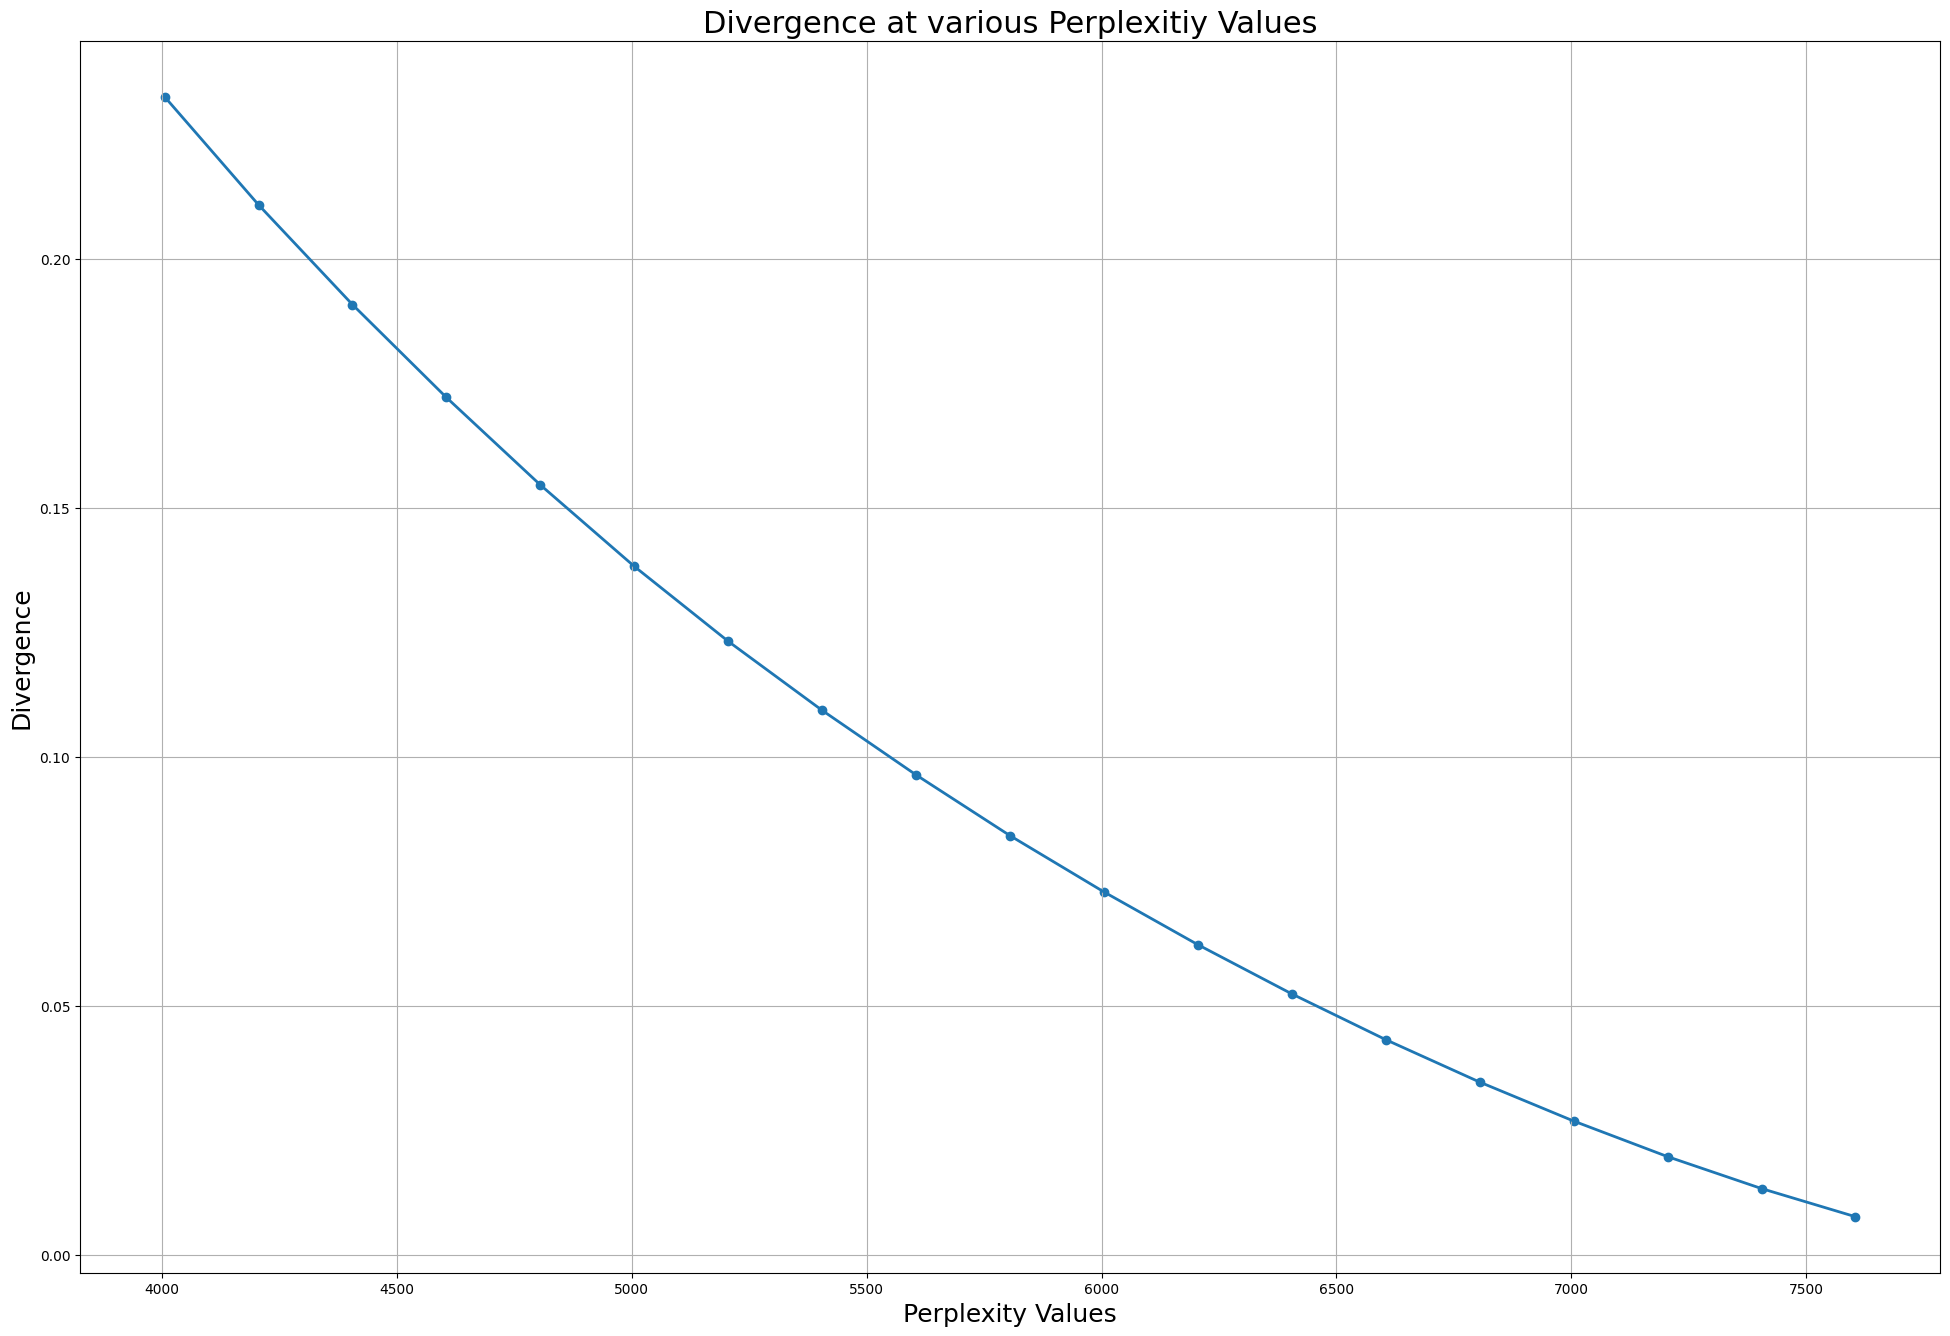

In [29]:
# plot
fig, ax = plt.subplots(figsize=(24,16))
ax.plot(perplexity, divergence, linewidth=2.0)
ax.scatter(perplexity, divergence)
ax.grid()
plt.xlabel('Perplexity Values', fontsize=18)
plt.ylabel('Divergence', fontsize=18)
plt.title('Divergence at various Perplexitiy Values', fontsize=22)
plt.show()

In [5]:
# transform distance matrix to 3-dimensional distance matrix
distance_matrix_embedded = TSNE(n_components=3, # number of desired dimensions
                                learning_rate='auto',
                                n_iter=5000, # number of iterations default is 1000
                                early_exaggeration=12.0, # default is 12.0
                                init='random',
                                perplexity=50 # perplexity is related to the number of neighbours
                                ).fit_transform(distance_matrix)

In [9]:
# turn matrix into pandas data frame
df_3d = pandas.DataFrame(distance_matrix_embedded, columns=['x', 'y', 'z'])
# add channel to data frame
df_3d['channel'] = videos['channel']
# add color column
add_color_column(df_3d)

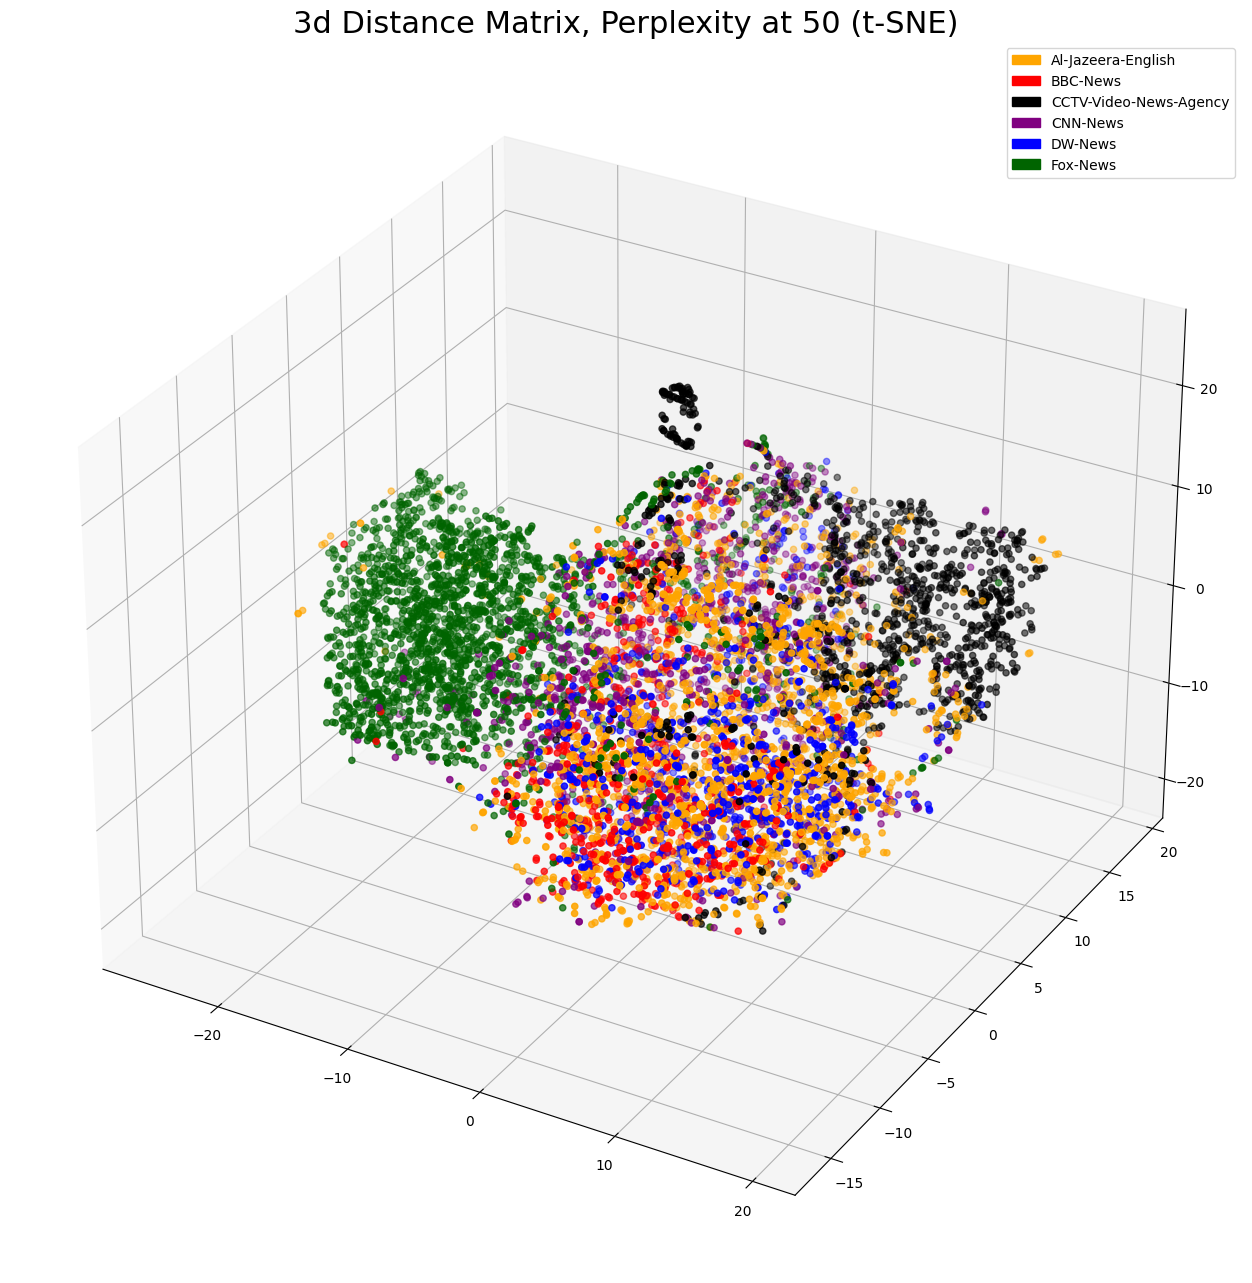

In [16]:
# plot distance matrix in 3 dimensions
# Creating legend with color box
pop_a = mpatches.Patch(color='orange', label='Al-Jazeera-English')
pop_b = mpatches.Patch(color='red', label='BBC-News')
pop_c = mpatches.Patch(color='black', label='CCTV-Video-News-Agency')
pop_d = mpatches.Patch(color='purple', label='CNN-News')
pop_e = mpatches.Patch(color='blue', label='DW-News')
pop_f = mpatches.Patch(color='darkgreen', label='Fox-News')
# create plot
figure = plt.figure(figsize=(16,16))
ax = figure.add_subplot(projection='3d')
# set axis behind other elements
ax.set_axisbelow(True)
# add grid
ax.grid()
# scatter plot distance matrix
ax.scatter(df_3d['x'], df_3d['y'], df_3d['z'], c=df_3d['colors'])
# add title, legend
plt.title('3d Distance Matrix, Perplexity at 50 (t-SNE)', fontsize=22)
ax.legend(handles=[pop_a,pop_b, pop_c, pop_d, pop_e, pop_f])